In [1]:
#The directive "%" talks to Jupter Notebook directly

%matplotlib inline

In [2]:
import xml.etree.ElementTree as ET
import numpy as np
#import Python Image Library (PIL)
from PIL import Image
from numpy import asarray


#import keras
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image


#current path
import os
PATH = os.getcwd()
print(PATH)


/home/luc/Jupyter Notebooks/Object Localization/Dogs vs Cats


Using TensorFlow backend.


folder {}
filename {}
source {}
size {}
segmented {}
object {}
annotation
folder
filename
source
database
annotation
image
size
width
height
depth
segmented
object
name
pose
truncated
occluded
bndbox
xmin
ymin
xmax
ymax
difficult
333 72 425 158


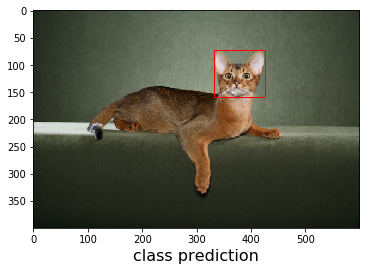

In [3]:

Abyssinian1 = ET.parse('./annotations/xmls/Abyssinian_1.xml')

root_Abyssinian1 = Abyssinian1.getroot()

#Name of top-level tag of the XML Tree; the root of the tree
root_Abyssinian1.tag

#Print out all children from root
for child in root_Abyssinian1:
    print(child.tag, child.attrib)

#Print out all elements of the tree
for elem in root_Abyssinian1.iter():
    print(elem.tag)

#Search for element bndbox, and within bndbox search for child element
#and output the text: bndbox.find('NAME_OF_CHILDELEMENT').text

for bndbox in root_Abyssinian1.iter('bndbox'):
    
    xmin = bndbox.find('xmin').text
    ymin = bndbox.find('ymin').text
    xmax = bndbox.find('xmax').text
    ymax = bndbox.find('ymax').text
    
    print(xmin, ymin, xmax, ymax)
    
#---------------------------#
#Draw bounding box around bounding box coordinates:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open('./images/Abyssinian_1.jpg'))

# Create figure and axes
#Polar Subplot with
# x-Axis running from left to right
# y-Axis running from top to bottom
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
#((x,y), width, height), where (x,y) is coordinate of top left bounding box corner
rect = patches.Rectangle((333,72),425-333,158-72,linewidth=1,edgecolor='r', facecolor='none')
#allgemein: ((xmin, ymin), xmax-xmin, ymax-ymin)

# Add the patch to the Axes
ax.add_patch(rect)

#Output Class prediction below the image
ax.set_xlabel('class prediction', fontsize=16)


plt.show()

In [4]:
#define path of images to be trained
train_img_path = PATH + '/selected dataset/selected images/'

img_train = []

#lst = List of all images in train_img_path
lst = os.listdir(train_img_path)
#sort the lst alphabetically
lst.sort()

lst



['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg',
 'Abyssinian_108.jpg',
 'Abyssinian_109.jpg',
 'Abyssinian_11.jpg',
 'Abyssinian_110.jpg',
 'Abyssinian_111.jpg',
 'Abyssinian_112.jpg',
 'Abyssinian_113.jpg',
 'Abyssinian_114.jpg',
 'Abyssinian_115.jpg',
 'Abyssinian_116.jpg',
 'Abyssinian_117.jpg',
 'Abyssinian_118.jpg',
 'Abyssinian_119.jpg',
 'Abyssinian_12.jpg',
 'Abyssinian_120.jpg',
 'Abyssinian_121.jpg',
 'Abyssinian_122.jpg',
 'Abyssinian_123.jpg',
 'Abyssinian_124.jpg',
 'Abyssinian_125.jpg',
 'Abyssinian_126.jpg',
 'Abyssinian_127.jpg',
 'Abyssinian_128.jpg',
 'Abyssinian_129.jpg',
 'Abyssinian_13.jpg',
 'Abyssinian_130.jpg',
 'Abyssinian_131.jpg',
 'Abyssinian_132.jpg',
 'Abyssinian_133.jpg',
 'Abyssinian_134.jpg',
 'Abyssinian_135.jpg',
 'Abyssinian_136.jpg',
 'Abyssinian_137.jpg',
 'Abyssinian_138.jpg',
 'Abyssinian_139.

In [5]:
#print first element of List lst
print(lst[0])

Abyssinian_1.jpg


In [6]:
#Set resized dimensions:
resized_width = 100
resized_height = 100



#For each image in lst, 
for sample in lst:
    #take the specific path to that image,
    img_path = train_img_path + sample
    #load that image,
    test_image = Image.open(img_path)
    #resize that image,
    test_image = test_image.resize((resized_width, resized_height), 3)
    #turn it into an array,
    data = asarray(test_image)
    #expand that 3-dim array into 4-dim array.
    data = np.expand_dims(data, axis=0)
    if img_path == train_img_path + lst[0]:
        #specify the first image/array to be the "total" img_array
        img_array = data
    else:
        #append all following arrays to the img_array
        img_array = np.append(img_array, data, axis=0)
    
#for white-and-black pics (channels=1), we can normalize the data points:
#img_array = img_array / 255
#now we can limit the range of the values to be of type float32:
#img_array = img_array.astype('float32')

#check format: should be numpy.ndarray
print(type(img_array))
#check shape: should be (number of pics, width, height, colourdimension)
print(img_array.shape)


<class 'numpy.ndarray'>
(894, 100, 100, 3)


In [7]:
img_array[0]

array([[[30, 38, 27],
        [32, 41, 30],
        [34, 44, 33],
        ...,
        [48, 56, 42],
        [46, 54, 41],
        [44, 52, 39]],

       [[31, 39, 28],
        [32, 42, 31],
        [34, 44, 33],
        ...,
        [50, 58, 44],
        [47, 55, 42],
        [45, 53, 40]],

       [[32, 40, 27],
        [33, 42, 30],
        [34, 44, 33],
        ...,
        [50, 58, 43],
        [47, 55, 41],
        [46, 54, 41]],

       ...,

       [[15, 22, 14],
        [15, 22, 14],
        [16, 23, 15],
        ...,
        [19, 27, 16],
        [18, 26, 15],
        [18, 26, 15]],

       [[13, 20, 12],
        [13, 20, 12],
        [14, 21, 13],
        ...,
        [19, 27, 16],
        [18, 26, 15],
        [18, 26, 15]],

       [[11, 18, 10],
        [12, 19, 11],
        [12, 19, 11],
        ...,
        [18, 26, 15],
        [17, 25, 14],
        [16, 24, 13]]], dtype=uint8)

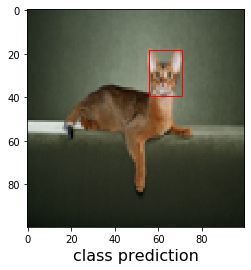

In [8]:
# Create figure and axes
#Polar Subplot with
# x-Axis running from left to right
# y-Axis running from top to bottom
fig,ax = plt.subplots(1)

# Display the image
first_test_image = Image.open(train_img_path + lst[0])
first_test_image = first_test_image.resize((resized_width, resized_height), 3)
ax.imshow(first_test_image)

# Create a Rectangle patch
#((x,y), width, height), where (x,y) is coordinate of top left bounding box corner
#modify bounding box with axis ratio to hit the right spot:
rect = patches.Rectangle((1/6 * 333, 1/4 * 72),1/6 *425-1/6 *333,1/4 *158-1/4 *72,linewidth=1,edgecolor='r', facecolor='none')
#allgemein: ((xmin, ymin), xmax-xmin, ymax-ymin)

# Add the patch to the Axes
ax.add_patch(rect)

#Output Class prediction below the image
ax.set_xlabel('class prediction', fontsize=16)


plt.show()

In [9]:
#define path of labels
train_labels_path = PATH + '/selected dataset/selected xmls/'

#list all files in directory train_labels_path:
lst_label = os.listdir(train_labels_path)
#sort this list:
lst_label.sort()

#output this list:
lst_label

['Abyssinian_1.xml',
 'Abyssinian_10.xml',
 'Abyssinian_100.xml',
 'Abyssinian_101.xml',
 'Abyssinian_102.xml',
 'Abyssinian_103.xml',
 'Abyssinian_105.xml',
 'Abyssinian_106.xml',
 'Abyssinian_107.xml',
 'Abyssinian_108.xml',
 'Abyssinian_109.xml',
 'Abyssinian_11.xml',
 'Abyssinian_110.xml',
 'Abyssinian_111.xml',
 'Abyssinian_112.xml',
 'Abyssinian_113.xml',
 'Abyssinian_114.xml',
 'Abyssinian_115.xml',
 'Abyssinian_116.xml',
 'Abyssinian_117.xml',
 'Abyssinian_118.xml',
 'Abyssinian_119.xml',
 'Abyssinian_12.xml',
 'Abyssinian_120.xml',
 'Abyssinian_121.xml',
 'Abyssinian_122.xml',
 'Abyssinian_123.xml',
 'Abyssinian_124.xml',
 'Abyssinian_125.xml',
 'Abyssinian_126.xml',
 'Abyssinian_127.xml',
 'Abyssinian_128.xml',
 'Abyssinian_129.xml',
 'Abyssinian_13.xml',
 'Abyssinian_130.xml',
 'Abyssinian_131.xml',
 'Abyssinian_132.xml',
 'Abyssinian_133.xml',
 'Abyssinian_134.xml',
 'Abyssinian_135.xml',
 'Abyssinian_136.xml',
 'Abyssinian_137.xml',
 'Abyssinian_138.xml',
 'Abyssinian_139.

In [10]:
print(type(lst_label))
print(lst_label[0])

<class 'list'>
Abyssinian_1.xml


In [11]:
label_array =[]
label_array_reg =[]


#For any xml-files in the lst_label list,
for sample_label in lst_label:
    #take its path,
    label_path = train_labels_path + sample_label
    #parse the xml file,
    xml = ET.parse(label_path)
    #get the root of the xml file.
    root_xml = xml.getroot()
    
    #Within the root, look for subbranch bndbox and iterate through its objects
    for bndbox in root_xml.iter('bndbox'):
    
        #fetch the coordinates:
        xmin = float(bndbox.find('xmin').text)
        ymin = float(bndbox.find('ymin').text)
        xmax = float(bndbox.find('xmax').text)
        ymax = float(bndbox.find('ymax').text)
        
        
    for orig_size in root_xml.iter('size'):
        
        width = float(orig_size.find('width').text)
        height = float(orig_size.find('height').text)
        
    #Within the root, look for the subbranch object and iterate through its objects    
    for animal_name in root_xml.iter('object'):
        
        #fetch the name of the animal
        animal = animal_name.find('name').text
        
        if animal == 'dog':
            animal = 1  
        else:
            animal = 0
    
    
    #Ratios:
    #For x:
    x_ratio = resized_width/width
    #For y:
    y_ratio = resized_height/height
    
    
    
    #save the coordinates and the class label in a small label array
    little_array2 = np.array([xmin*x_ratio, ymin*y_ratio, xmax*x_ratio, ymax*y_ratio])
    
    
    
    #save class labels in small label array
    little_array = np.array([animal])
    
    #If its the first xml label, 
    if label_path == train_labels_path + lst_label[0]:
        #then start off with the small array to be the "total" label array
        label_array = np.append(label_array, little_array)
    else:
        #otherwise, all other label arrays are appended to the "total" array
        label_array = np.append(label_array, little_array, axis=0)     
        
        
        #If its the first xml label, 
    if label_path == train_labels_path + lst_label[0]:
        #then start off with the small array to be the "total" label array
        label_array_reg = np.append(label_array_reg, little_array2)
    else:
        #otherwise, all other label arrays are appended to the "total" array
        label_array_reg = np.append(label_array_reg, little_array2, axis=0)   

        
        
        
#Reshape to achieve format (total number of labels, 5)    
label_array_reg = np.reshape(label_array_reg, (894,4))    

#Reshape to achieve format (total number of labels, 1)    
label_array = np.reshape(label_array, (894,1))    

In [12]:
#check format: should be numpy.ndarray
print(type(label_array))
#check shape: should be (number of pics, number of labels)
#here: number of labels = 4 (xmin, ymin, xmax, ymax) + 1 (class name: 1 for dog, 0 for cat) = 5
print(label_array.shape)

print(type(label_array_reg))
print(label_array_reg.shape)
print(label_array_reg)

<class 'numpy.ndarray'>
(894, 1)
<class 'numpy.ndarray'>
(894, 4)
[[55.5        18.         70.83333333 39.5       ]
 [19.2        21.         76.8        58.2       ]
 [38.3248731  14.2        85.02538071 53.4       ]
 ...
 [20.6        15.96385542 81.6        94.57831325]
 [16.58031088  6.6        65.02590674 57.        ]
 [18.6         4.8048048  81.8        98.1981982 ]]


In [13]:
label_array

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [14]:
num_classes = 2
input_shape = (resized_width, resized_height, 3)

batch_size = 8
epochs = 3

num_regressions = 4

In [15]:
#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)

label_array = keras.utils.to_categorical(label_array, num_classes)

In [16]:
print(label_array_reg.shape)
print(label_array)

(894, 4)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [17]:
model_base = Sequential()
model_base.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_base.add(MaxPooling2D(pool_size=(2, 2)))
model_base.add(Conv2D(64, (3, 3), activation='relu'))
model_base.add(MaxPooling2D(pool_size=(2, 2)))
#final_base_map = model_base.add(MaxPooling2D(pool_size=(2, 2)))
model_base.add(Flatten())
model_base.add(Dense(128, activation='relu'))
model_base.add(Dropout(0.25))
model_base.add(Dense(num_classes, activation='softmax'))

model_base.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
model_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4333696   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [19]:
regression_head = Sequential()
regression_head.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
regression_head.add(MaxPooling2D(pool_size=(2, 2)))
regression_head.add(Conv2D(64, (3, 3), activation='relu'))
regression_head.add(MaxPooling2D(pool_size=(2, 2)))
#final_base_map = model_base.add(MaxPooling2D(pool_size=(2, 2)))
regression_head.add(Flatten())
regression_head.add(Dense(128, activation='relu'))
regression_head.add(Dropout(0.25))
regression_head.add(Dense(num_regressions, activation='relu'))

regression_head.compile(optimizer='adam', 
              loss='mse',
              metrics=['accuracy'])

In [20]:
regression_head.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4333696   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [21]:
model_base.fit(img_array, label_array,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/3
894/894 [==============================] - 7s 7ms/step - loss: 8.9454 - acc: 0.4407
Epoch 2/3
894/894 [==============================] - 4s 5ms/step - loss: 8.9475 - acc: 0.4418
Epoch 3/3
894/894 [==============================] - 4s 5ms/step - loss: 8.9655 - acc: 0.4407


In [28]:
regression_head.fit(img_array, label_array_reg,
          batch_size=2*batch_size,
          epochs=2*epochs,
          verbose=1)

Epoch 1/6
894/894 [==============================] - 3s 3ms/step - loss: 609.1569 - acc: 0.6913
Epoch 2/6
894/894 [==============================] - 3s 3ms/step - loss: 600.1221 - acc: 0.6723
Epoch 3/6
894/894 [==============================] - 3s 3ms/step - loss: 604.8679 - acc: 0.6588
Epoch 4/6
894/894 [==============================] - 3s 3ms/step - loss: 600.3732 - acc: 0.6745
Epoch 5/6
894/894 [==============================] - 3s 3ms/step - loss: 570.2472 - acc: 0.6644
Epoch 6/6
894/894 [==============================] - 3s 3ms/step - loss: 578.1511 - acc: 0.6678


In [29]:
model_base.save("model_base.h5")
print("Saved model for classification to disk")

regression_head.save("regression_head.h5")
print("Saved model for regression values to disk")

Saved model for classification to disk
Saved model for regression values to disk


In [30]:
from keras.models import load_model

model_base = load_model('model_base.h5')
regression_head = load_model('regression_head.h5')

In [31]:
PATH

'/home/luc/Jupyter Notebooks/Object Localization/Dogs vs Cats'

In [36]:
from keras.preprocessing import image

#load image from 'test' folder to be predicted;
#transform them to the right size 100x100
#these images are totally new to the CNN
img = image.load_img(PATH + "/images/Maine_Coon_262.jpg", target_size=(100, 100))
#make an array out of it
x = image.img_to_array(img)

# Add a forth dimension since Keras expects a list of images
x2 = np.expand_dims(x, axis=0)
# Make a prediction with the CNN
prediction = model_base.predict(x2)

#prediction will either be [[1. 0.]] or [[0. 1.]]
#[[1. 0.]] means: cat
#[[0. 1.]] means: dog
print(prediction)

#Prediction output:
#prediction[0][0] will grab the first element of the array, prediction[0][1] the second
if prediction[0][0] > 0.5:
    print("It's a cat!")
else:
    print("It's a dog!")

[[1. 0.]]
It's a cat!


[[ 0.       16.557753 87.945    74.19865 ]]


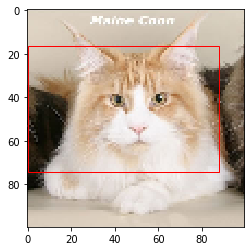

In [37]:

prediction_reg = regression_head.predict(x2)
print(prediction_reg)


xmin = prediction_reg[0][0]
ymin = prediction_reg[0][1]
xmax = prediction_reg[0][2]
ymax = prediction_reg[0][3]

#im = np.array(Image.open(PATH + "/images/staffordshire_bull_terrier_4.jpg"))

# Create figure and axes
#Polar Subplot with
# x-Axis running from left to right
# y-Axis running from top to bottom
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

#fig,ax = plt.subplots(1)

# Display the image
#ax.imshow(img)
rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r', facecolor='none')

ax.add_patch(rect)



